# Introduction au fichier

Décrire ici le travail en cours et la base de données.

In [ ]:
# penser à créer un fichier requirments pour que le programme soit executable par n'importe quel ordinateur.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# fonctionne pas pour le moment : import geopandas as gpd

In [16]:
# On importe la base de données
base = pd.read_csv("Data_IRFCL_ARA.csv",delimiter=",")

# On transforme le format de la variable numérique "year" en variable temporelle*
base['year'] = pd.to_datetime(base['year'], format="%Y")

base.columns

Index(['country', 'iso', 'year', 'deposits', 'securities', 'country_id',
       'region', 'reserves_ara', '_merge', 'share_securities',
       'share_deposits', 'western_asia', 'eastern_asia', 'central_asia',
       'southeastern_asia', 'asia', 'eastern_europe', 'northern_europe',
       'southern_europe', 'western_europe', 'europe', 'northern_africa',
       'eastern_africa', 'middle_africa', 'southern_africa', 'western_africa',
       'africa', 'carribean', 'central_america', 'south_america',
       'northern_america', 'america', 'oceania'],
      dtype='object')

In [7]:
base.describe()

,year,deposits,securities,country_id,reserves_ara,share_securities,share_deposits,western_asia,eastern_asia,central_asia,...,middle_africa,southern_africa,western_africa,africa,carribean,central_america,south_america,northern_america,america,oceania
count,3700,1.811000e+03,1.789000e+03,2470.000000,1604.000000,1.779000e+03,1779.000000,428.0,96.0,96.0,...,70.0,87.0,0.0,428.0,210.0,271.0,350.0,52.0,883.0,383.0
mean,2008-04-07 02:29:26.918918912,1.228058e+10,7.577412e+10,48.000000,106.639944,7.248987e+01,27.510126,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,1990-01-01 00:00:00,1.083181e+06,-3.998462e-02,1.000000,0.000000,-1.957975e-10,0.109085,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,2001-01-01 00:00:00,8.793385e+08,2.609507e+09,24.000000,60.598648,5.940211e+01,9.099009,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,2009-01-01 00:00:00,3.451063e+09,1.112390e+10,48.000000,98.412529,8.026925e+01,19.730751,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,2017-01-01 00:00:00,1.116211e+10,4.248918e+10,72.000000,145.198355,9.090099e+01,40.597894,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,2024-01-01 00:00:00,2.056967e+11,3.311735e+12,95.000000,372.674990,9.989092e+01,100.000000,1.0,1.0,1.0,...,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,NaN,2.570995e+10,2.705179e+11,27.428171,67.077982,2.412909e+01,24.129090,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# On organise la base pour opérer des comparaisons graphiques
base_tidy = base.melt(id_vars=["year","country"],var_name="variable", value_name="value")

# On nettoie la base
base_tidy = base_tidy.dropna(how='any',axis=0)
base_tidy["variable"] = base_tidy["variable"].astype("category")

             year  country variable value
0      1999-01-01   ANGOLA      iso   AGO
1      2000-01-01   ANGOLA      iso   AGO
2      2001-01-01   ANGOLA      iso   AGO
3      2002-01-01   ANGOLA      iso   AGO
4      2003-01-01   ANGOLA      iso   AGO
...           ...      ...      ...   ...
114412 2020-01-01  Romania  oceania   1.0
114413 2021-01-01  Romania  oceania   1.0
114414 2022-01-01  Romania  oceania   1.0
114415 2023-01-01  Romania  oceania   1.0
114416 2024-01-01  Romania  oceania   1.0

[28309 rows x 4 columns]


In [ ]:
# Je garde uniquement les valeurs qui nous intéressent
base_reduced = base_tidy[base_tidy["variable"].isin(["share_securities", "reserves_ara"])]

# Quelques essais pour faire un graphique
#sns.lineplot(x="year",y="share_securities", data=base, hue="country")
#plt.xlabel("Année")
#plt.ylabel("Part des titres dans les réserves de change")
#plt.title("Évolution de la part des titres dans les réserves de change par pays")

            year      country          variable      value
18510 2009-01-01       ANGOLA      reserves_ara  114.00046
18511 2010-01-01       ANGOLA      reserves_ara  138.81708
18512 2011-01-01       ANGOLA      reserves_ara  162.53152
18513 2012-01-01       ANGOLA      reserves_ara  181.20442
18514 2013-01-01       ANGOLA      reserves_ara  160.40482
...          ...          ...               ...        ...
28365 2020-01-01  SOUTHAFRICA  share_securities  82.959114
28366 2021-01-01  SOUTHAFRICA  share_securities  83.867531
28367 2022-01-01  SOUTHAFRICA  share_securities  74.119087
28368 2023-01-01  SOUTHAFRICA  share_securities  73.606598
28369 2024-01-01  SOUTHAFRICA  share_securities  71.739082

[3383 rows x 4 columns]


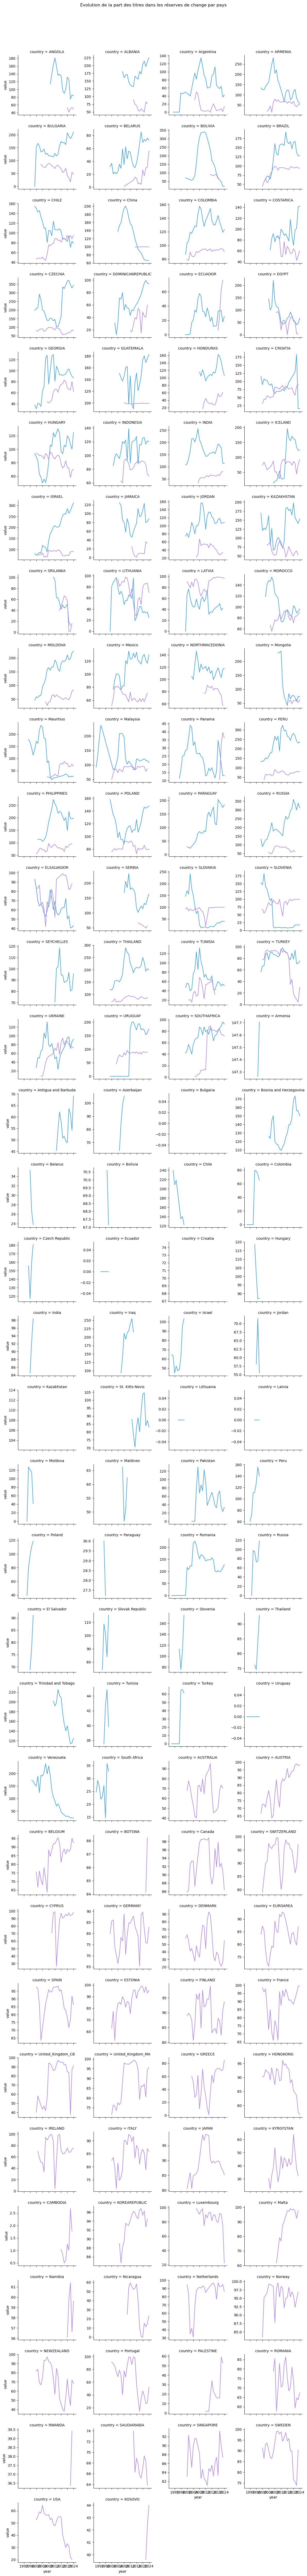

In [ ]:
g = sns.FacetGrid(base_reduced, col="country", col_wrap=4, height=3,sharey=False)  # Ajuster le nombre de colonnes (col_wrap)
g.map(sns.lineplot, "year", "value", "variable")

plt.subplots_adjust(top=0.975)
g.fig.suptitle("Évolution de la part des titres dans les réserves de change par pays")


plt.show()